In [1]:
import numpy as np
import os
import glob
import json 


In [2]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()

d = {}
db = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_corpt_1/stats_json/length_stats.json',p[i]+'/tracto_op_corpt_2/stats_json/length_stats.json']
    b = [p[i]+'/tracto_op_lr_corr_1/stats_json/length_stats.json',p[i]+'/tracto_op_lr_corr_2/stats_json/length_stats.json']
    d[i] = a
    db[i] = b

count = 0
dicts = []
Ldicts = []
maj_bun = ['CC_Fr_2','FAT_L','FAT_R','SLF_L','SLF_R']
filepass = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]) and os.path.exists(db[i][0]) and os.path.exists(db[i][1]) :
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length corpt 1 


        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['mean_length'] # assign bundle to mean length corpt 2 
        
        f = open(db[i][0])
        data = json.load(f)
        Lmean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 
            Lmean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length corpt 1 


        f = open(db[i][1])
        data1 = json.load(f)
        Lmean_len1 = {} # make a new dict with mapping bundles and meanlength
        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 
            Lmean_len1[b_key1[j]] = v1[j]['mean_length'] # assign bundle to mean length corpt 2 

        diff = {}
        Ldiff = {}
        for key in mean_len: 
            if key in maj_bun and key in list(mean_len1.keys()) and  key in list(Lmean_len.keys()) and  key in list(Lmean_len1.keys()): #mean_len1:
                c_mean = np.nanmean([mean_len[key] , mean_len1[key]])
                c_std = np.nanstd([mean_len[key] , mean_len1[key]])
                diff[key] = (c_std / c_mean)  # cov for corpt 
                
                Lc_mean = np.nanmean([Lmean_len[key] , Lmean_len1[key]])
                Lc_std = np.nanstd([Lmean_len[key] , Lmean_len1[key]])
                Ldiff[key] = (Lc_std / Lc_mean)  # cov for corpt 
    else:
        diff = 'nan'
            
    dicts.append(diff)
    Ldicts.append(Ldiff)
import pandas as pd
elen_df = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            new_row = {'0': i[key], 'x':(key+'_corpt'), 'lr':'corpt'}
            elen_df = elen_df.append(new_row, ignore_index=True )
            
len_df = pd.DataFrame()
for i in Ldicts:
    if i != 'nan':
        for key in i:
            new_row = {'0': i[key], 'x':(key+'_corr'), 'lr':'corr'}
            len_df = len_df.append(new_row, ignore_index=True )

In [3]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/'):
    p.append(path)
p.sort()
dicts = []
Ldicts = []
for i in range(len(p)):
    count = 0
    for j in os.listdir(p[i]):
        count = count + 1
        if count != 2: # only taking one session 
            a = p[i] + j + '/tracto_op_corpt_1/stats_json/length_stats.json' 
            b = p[i] + j + '/tracto_op_lr_corr_1/stats_json/length_stats.json' 
            if os.path.exists(a): # get the len stat file if exists
                f = open(a)
                data = json.load(f)
                mean_len = {} # make a new dict with mapping bundles and meanlength
                k = list(data.keys())[0] 
                b_key = list(data[k].keys())# get the bundles
                v = list(data[k].values())  # get the values
                for j in range(len(b_key)): 
                    mean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length
                    
                f = open(b) # correct
                data = json.load(f)
                mean_len1 = {} # make a new dict with mapping bundles and meanlength
                k = list(data.keys())[0] 
                b_key = list(data[k].keys())# get the bundles
                v = list(data[k].values())  # get the values
                for j in range(len(b_key)): 
                    mean_len1[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length
                    
                pmean_len = {}
                pmean_len1 = {}
                for key in mean_len: 
                    if key in maj_bun and key in list(mean_len1.keys()): #mean_len1:
                        pmean_len[key] = mean_len[key]
                        pmean_len1[key] = mean_len1[key]
            else:
                print('lala')
                mean_len = 'nan'
            
            dicts.append(pmean_len)
            Ldicts.append(pmean_len1)
import pandas as pd
emn_df = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':(key+'_corpt'), 'lr':'corpt'}
            emn_df = emn_df.append(new_row, ignore_index=True )
            
mn_df = pd.DataFrame()
for i in Ldicts:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':(key+'_corr'), 'lr':'corr'}
            mn_df = mn_df.append(new_row, ignore_index=True )

In [4]:
len(emn_df)

301

In [15]:
cov_len  = pd.concat([elen_df,len_df])
cb = cov_len[(cov_len.x == 'CC_Fr_2_corpt')]
cc = cov_len[(cov_len.x == 'FAT_L_corpt')]
cd = cov_len[(cov_len.x == 'FAT_R_corpt')]
ce = cov_len[(cov_len.x == 'CC_Pr_Po_corpt')]
cf = cov_len[(cov_len.x == 'SLF_L_corpt')]
cg = cov_len[(cov_len.x == 'SLF_R_corpt')]

clb = cov_len[(cov_len.x == 'CC_Fr_2_corr')]
clc = cov_len[(cov_len.x == 'FAT_L_corr')]
cld = cov_len[(cov_len.x == 'FAT_R_corr')]
cle = cov_len[(cov_len.x == 'CC_Pr_Po_corr')]
clf = cov_len[(cov_len.x == 'SLF_L_corr')]
clg = cov_len[(cov_len.x == 'SLF_R_corr')]

top_cov_len = pd.concat([cb,clb,cc,clc,cd,cld,ce,cle,cf,clf,cg,clg])
AF = pd.concat([cb,clb])
diffAF =  ((np.array(clb['0']) - np.array(cb['0'])))

CC_Fr_1 = pd.concat([cc,clc])
diffCC_Fr_1 =  ((np.array(clc['0']) - np.array(cc['0']))) 

CC_Fr_2 = pd.concat([cd,cld])
diffCC_Fr_2 = ((np.array(cld['0']) - np.array(cd['0']))) 

CC_Pr_Po = pd.concat([ce,cle])
diffCC_Pr_Po =  ((np.array(cle['0']) - np.array(ce['0'])))

FAT_L = pd.concat([cf,clf])
diffFAT_L = ((np.array(clf['0']) - np.array(cf['0'])))

FAT_R = pd.concat([cg,clg])
diffFAT_R = ((np.array(clg['0']) - np.array(cg['0']))) 

In [6]:
print(np.median(diffAF)) 
print(np.median(diffCC_Fr_1)) 
print(np.median(diffCC_Fr_2)) 
print(np.median(diffFAT_L)) 
print(np.median(diffFAT_R)) 

0.0034456691446772894
0.00799919631024397
0.007920279014087655
0.006381368443223342
0.006714966533024452


In [8]:
org_len  = pd.concat([emn_df,mn_df])
b = org_len[(org_len.x == 'CC_Fr_2_corpt')]
c = org_len[(org_len.x == 'FAT_L_corpt')]
d = org_len[(org_len.x == 'FAT_R_corpt')]
e = org_len[(org_len.x == 'CC_Pr_Po_corpt')]
f = org_len[(org_len.x == 'SLF_L_corpt')]
g = org_len[(org_len.x == 'SLF_R_corpt')]

lb = org_len[(org_len.x == 'CC_Fr_2_corr')]
lc = org_len[(org_len.x == 'FAT_L_corr')]
ld = org_len[(org_len.x == 'FAT_R_corr')]
le = org_len[(org_len.x == 'CC_Pr_Po_corr')]
lf = org_len[(org_len.x == 'SLF_L_corr')]
lg = org_len[(org_len.x == 'SLF_R_corr')]

top_org_len = pd.concat([b,lb,c,lc,d,ld,e,le,f,lf,g,lg])
oAF = pd.concat([b,lb])
odiffAF =  np.abs((np.array(lb['0']) - np.array(b['0'])) /  np.array(b['0'])) * 100

oCC_Fr_1 = pd.concat([c,lc])
odiffCC_Fr_1 =  np.abs((np.array(lc['0']) - np.array(c['0'])) /  np.array(c['0'])) * 100

oCC_Fr_2 = pd.concat([d,ld])
odiffCC_Fr_2 = np.abs((np.array(ld['0']) - np.array(d['0'])) / np.array(d['0'])) * 100

oCC_Pr_Po = pd.concat([e,le])
odiffCC_Pr_Po =  np.abs((np.array(le['0']) - np.array(e['0'])) /  np.array(e['0'])) * 100

oFAT_L = pd.concat([f,lf])
odiffFAT_L = np.abs((np.array(lf['0']) - np.array(f['0'])) / np.array(f['0'])) * 100

oFAT_R = pd.concat([g,lg])
odiffFAT_R = np.abs((np.array(lg['0']) - np.array(g['0'])) / np.array(g['0'])) * 100

In [9]:
print(np.median(odiffAF)) 
print(np.median(odiffCC_Fr_1)) 
print(np.median(odiffCC_Fr_2)) 
print(np.median(odiffFAT_L)) 
print(np.median(odiffFAT_R)) 

0.6835946542669384
1.5295935811380512
1.0673223530906077
1.843423562216518
1.3903079366430509


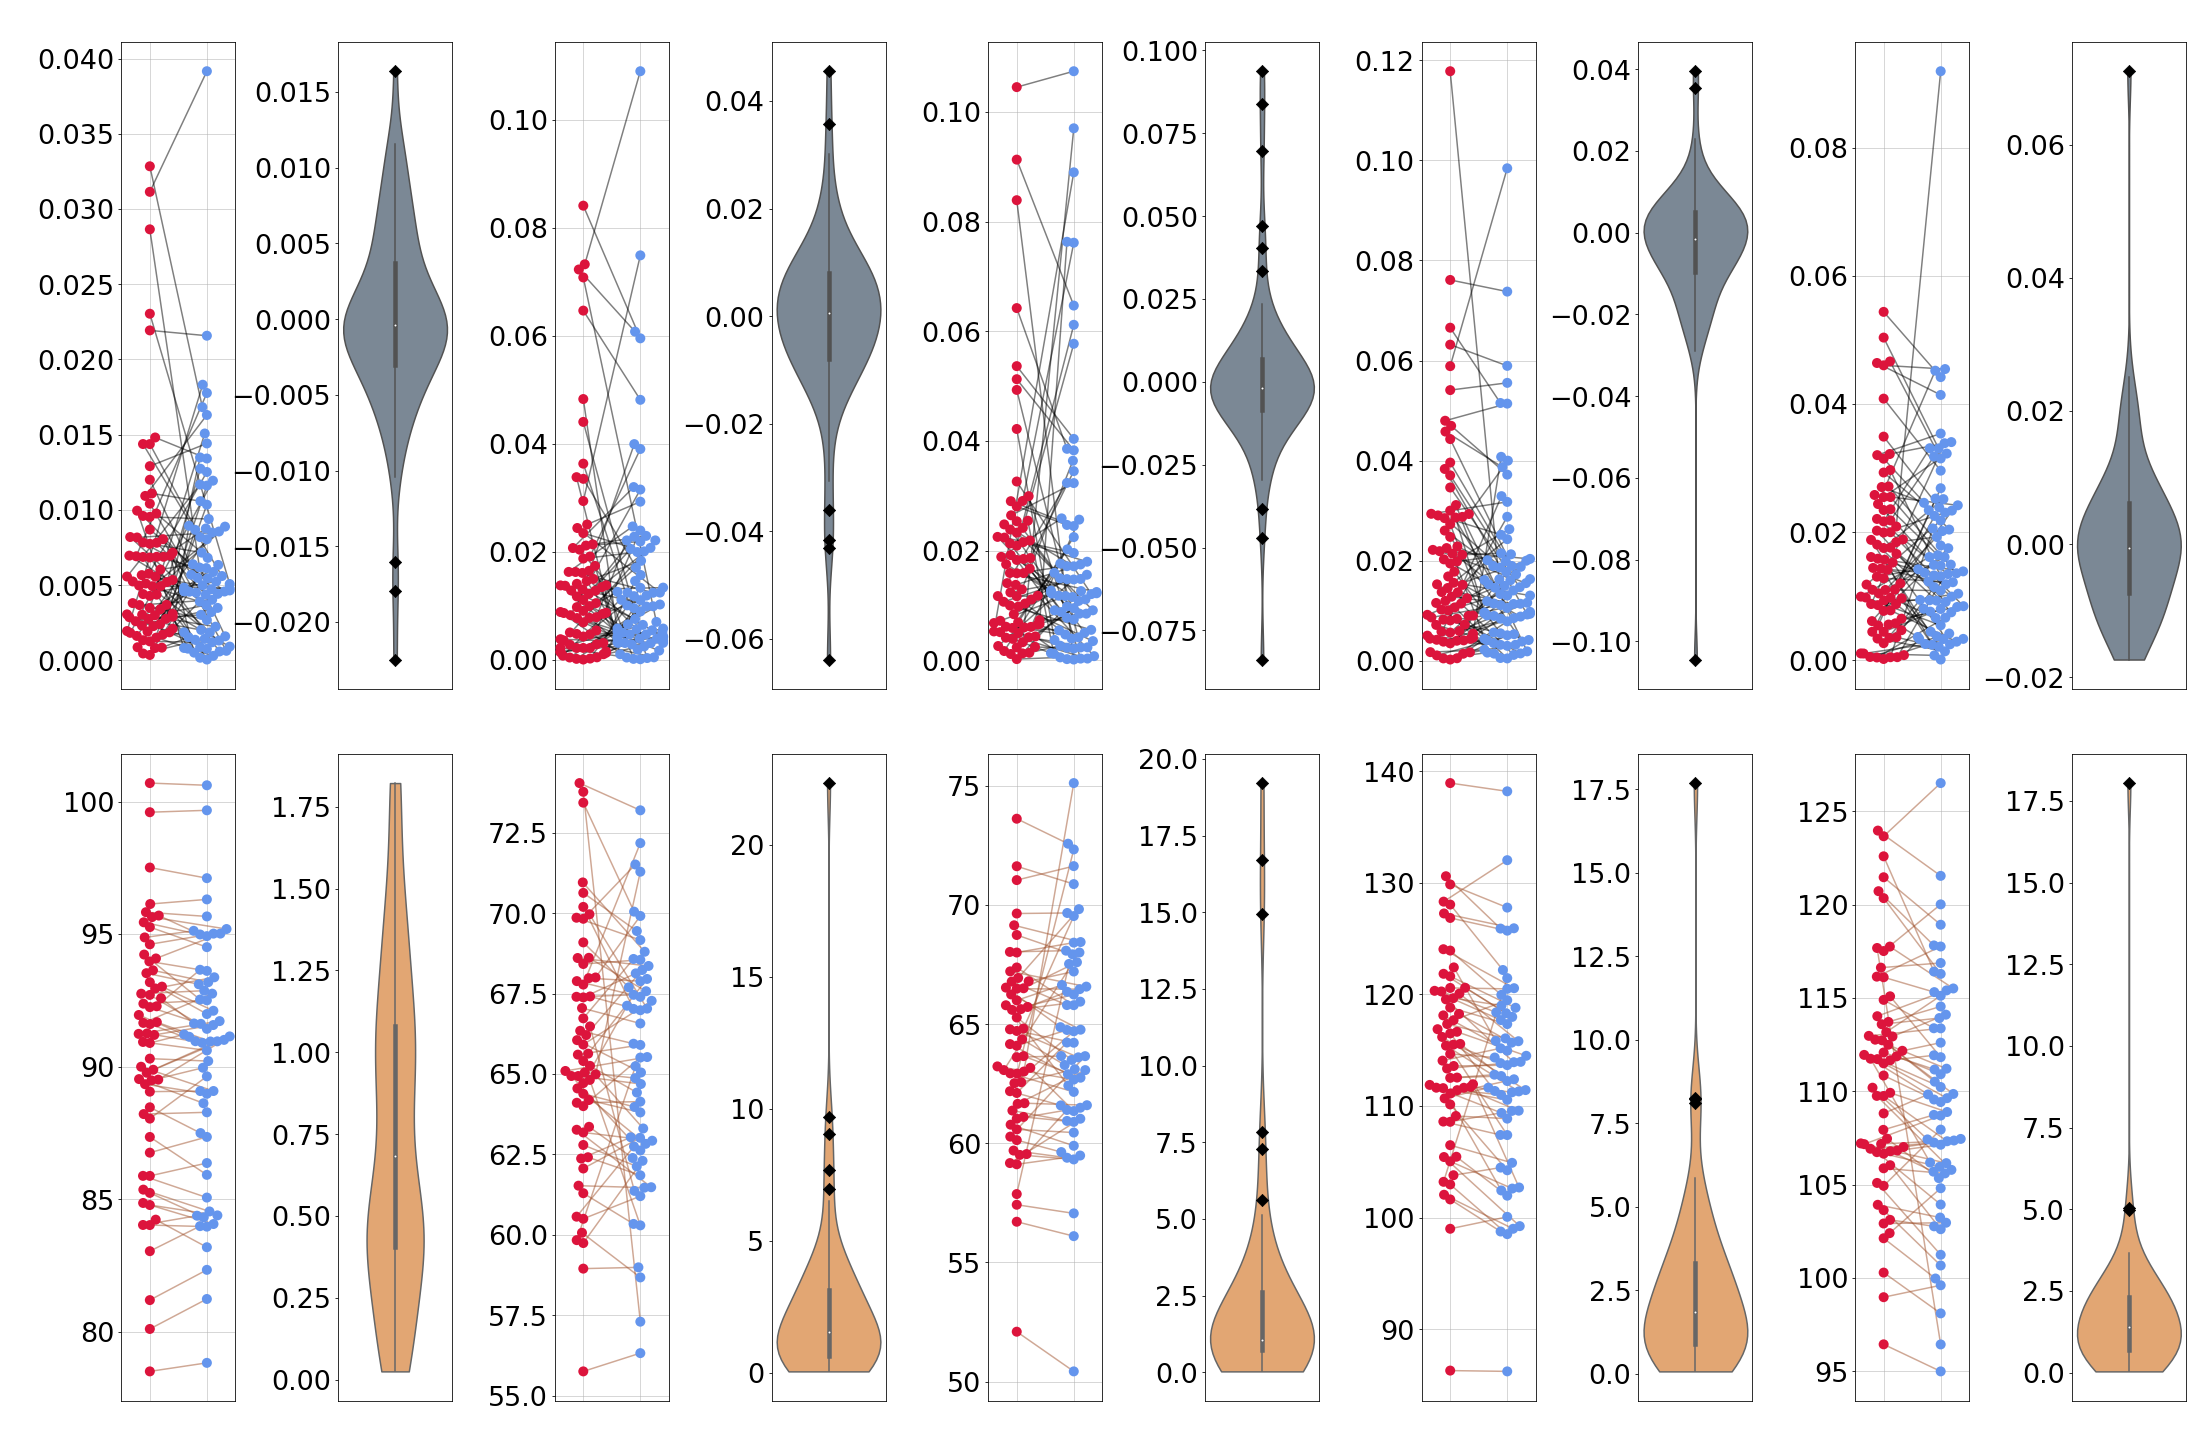

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,10, figsize=(37,25)) # gridspec_kw = {'width_ratios': [1,0.5,0.5]})

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
palette= {'corpt': 'crimson','corr': 'cornflowerblue'}

#box_plot = sns.swarmplot(ax = axes[0,0], x="x",y=0,data=Cdfmod,flierprops=flierprops, width=0.4 , palette=palette)#, labels=["Without L(r) Correction","With L(r) Correction"])
box_plot = sns.swarmplot(ax = axes[0,0], x="x",y='0',data=AF,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[0,0].legend([],[],frameon=False)
axes[0,0].set_title(' ', fontsize=27, pad=15)
axes[0,0].set_ylabel(' ',fontsize = 27)
axes[0,0].set_xlabel(' ')
axes[0,0].tick_params(bottom=False)
axes[0,0].grid(True,linewidth=0.5)
axes[0,0].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[0,0].get_children()[idx0].get_offsets()
locs2 = axes[0,0].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(cb['0'].tolist())
sort_idxs2 = np.argsort(clb['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0,0].plot(x, y, color="black", alpha=0.5)

sns.violinplot(ax=axes[0,1],data=diffAF,color='lightslategray',width=0.5,bw=0.35,cut=0)
axes[0,1].tick_params(bottom=False)
axes[0,1].set_xticklabels([])
q1, q3 = np.percentile(diffAF, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = diffAF[(diffAF>w_high) | (diffAF < w_low)]
sns.scatterplot(ax=axes[0,1],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[0,2], x="x",y='0',data=CC_Fr_1,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[0,2].legend([],[],frameon=False)
axes[0,2].set_title(' ', fontsize=27, pad=15)
axes[0,2].set_ylabel(' ',fontsize = 42)
axes[0,2].set_xlabel(' ')
axes[0,2].tick_params(bottom=False)
axes[0,2].grid(True,linewidth=0.5)
axes[0,2].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[0,2].get_children()[idx0].get_offsets()
locs2 = axes[0,2].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(cc['0'].tolist())
sort_idxs2 = np.argsort(clc['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0,2].plot(x, y, color="black", alpha=0.5)

sns.violinplot(ax=axes[0,3],data=diffCC_Fr_1,color='lightslategray',width=0.5,bw=0.35,cut=0)
axes[0,3].tick_params(bottom=False)
axes[0,3].set_xticklabels([])
q1, q3 = np.percentile(diffCC_Fr_1, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = diffCC_Fr_1[(diffCC_Fr_1>w_high) | (diffCC_Fr_1 < w_low)]
sns.scatterplot(ax=axes[0,3],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[0,4], x="x",y='0',data=CC_Fr_2,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[0,4].legend([],[],frameon=False)
axes[0,4].set_title(' ', fontsize=27, pad=15)
axes[0,4].set_ylabel(' ',fontsize = 42)
axes[0,4].set_xlabel(' ')
axes[0,4].tick_params(bottom=False)
axes[0,4].grid(True,linewidth=0.5)
axes[0,4].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[0,4].get_children()[idx0].get_offsets()
locs2 = axes[0,4].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(cd['0'].tolist())
sort_idxs2 = np.argsort(cld['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0,4].plot(x, y, color="black", alpha=0.5)

sns.violinplot(ax=axes[0,5],data=diffCC_Fr_2,color='lightslategray',width=0.5,bw=0.35,cut=0)
axes[0,5].tick_params(bottom=False)
axes[0,5].set_xticklabels([])
q1, q3 = np.percentile(diffCC_Fr_2, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = diffCC_Fr_2[(diffCC_Fr_2>w_high) | (diffCC_Fr_2 < w_low)]
sns.scatterplot(ax=axes[0,5],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[0,6], x="x",y='0',data=FAT_L,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[0,6].legend([],[],frameon=False)
axes[0,6].set_title(' ', fontsize=27, pad=15)
axes[0,6].set_ylabel(' ',fontsize = 42)
axes[0,6].set_xlabel(' ')
axes[0,6].tick_params(bottom=False)
axes[0,6].grid(True,linewidth=0.5)
axes[0,6].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[0,6].get_children()[idx0].get_offsets()
locs2 = axes[0,6].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(cf['0'].tolist())
sort_idxs2 = np.argsort(clf['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0,6].plot(x, y, color="black", alpha=0.5)

sns.violinplot(ax=axes[0,7],data=diffFAT_L,color='lightslategray',width=0.5,bw=0.35,cut=0)
axes[0,7].tick_params(bottom=False)
axes[0,7].set_xticklabels([])
q1, q3 = np.percentile(diffFAT_L, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = diffFAT_L[(diffFAT_L>w_high) | (diffFAT_L < w_low)]
sns.scatterplot(ax=axes[0,7],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[0,8], x="x",y='0',data=FAT_R,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[0,8].legend([],[],frameon=False)
axes[0,8].set_title(' ', fontsize=27, pad=15)
axes[0,8].set_ylabel(' ',fontsize = 27)
axes[0,8].set_xlabel(' ')
axes[0,8].tick_params(bottom=False)
axes[0,8].grid(True,linewidth=0.5)
axes[0,8].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[0,8].get_children()[idx0].get_offsets()
locs2 = axes[0,8].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(cg['0'].tolist())
sort_idxs2 = np.argsort(clg['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0,8].plot(x, y, color="black", alpha=0.5)

sns.violinplot(ax=axes[0,9],data=diffFAT_R,color='lightslategray',width=0.5,bw=0.35,cut=0)
axes[0,9].tick_params(bottom=False)
axes[0,9].set_xticklabels([])
q1, q3 = np.percentile(diffFAT_R, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = diffFAT_R[(diffFAT_R>w_high) | (diffFAT_R < w_low)]
sns.scatterplot(ax=axes[0,9],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[1,0], x="x",y='0',data=oAF,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[1,0].legend([],[],frameon=False)
axes[1,0].set_title(' ', fontsize=45, pad=15)
axes[1,0].set_ylabel(' ',fontsize = 27)
axes[1,0].set_xlabel(' ')
axes[1,0].tick_params(bottom=False)
axes[1,0].grid(True,linewidth=0.5)
axes[1,0].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[1,0].get_children()[idx0].get_offsets()
locs2 = axes[1,0].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(b['0'].tolist())
sort_idxs2 = np.argsort(lb['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[1,0].plot(x, y, color="sienna", alpha=0.5)

sns.violinplot(ax=axes[1,1],data=odiffAF,color='sandybrown',width=0.5,bw=0.35,cut=0)
axes[1,1].tick_params(bottom=False)
axes[1,1].set_xticklabels([])
q1, q3 = np.percentile(odiffAF, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = odiffAF[(odiffAF>w_high) | (odiffAF < w_low)]
sns.scatterplot(ax=axes[1,1],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[1,2], x="x",y='0',data=oCC_Fr_1,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[1,2].legend([],[],frameon=False)
axes[1,2].set_title(' ', fontsize=45, pad=15)
axes[1,2].set_ylabel(' ',fontsize = 27)
axes[1,2].set_xlabel(' ')
axes[1,2].tick_params(bottom=False)
axes[1,2].grid(True,linewidth=0.5)
axes[1,2].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[1,2].get_children()[idx0].get_offsets()
locs2 = axes[1,2].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(c['0'].tolist())
sort_idxs2 = np.argsort(lc['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[1,2].plot(x, y, color="sienna", alpha=0.5)

sns.violinplot(ax=axes[1,3],data=odiffCC_Fr_1,color='sandybrown',width=0.5 , bw=0.35,cut=0)
axes[1,3].tick_params(bottom=False)
axes[1,3].set_xticklabels([])
q1, q3 = np.percentile(odiffCC_Fr_1, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = odiffCC_Fr_1[(odiffCC_Fr_1>w_high) | (odiffCC_Fr_1 < w_low)]
sns.scatterplot(ax=axes[1,3],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[1,4], x="x",y='0',data=oCC_Fr_2,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[1,4].legend([],[],frameon=False)
axes[1,4].set_title(' ', fontsize=45, pad=15)
axes[1,4].set_ylabel(' ',fontsize = 27)
axes[1,4].set_xlabel(' ')
axes[1,4].tick_params(bottom=False)
axes[1,4].grid(True,linewidth=0.5)
axes[1,4].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[1,4].get_children()[idx0].get_offsets()
locs2 = axes[1,4].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(d['0'].tolist())
sort_idxs2 = np.argsort(ld['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[1,4].plot(x, y, color="sienna", alpha=0.5)

sns.violinplot(ax=axes[1,5],data=odiffCC_Fr_2,color='sandybrown',width=0.5,bw=0.35,cut=0)
axes[1,5].tick_params(bottom=False)
axes[1,5].set_xticklabels([])
q1, q3 = np.percentile(odiffCC_Fr_2, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = odiffCC_Fr_2[(odiffCC_Fr_2>w_high) | (odiffCC_Fr_2 < w_low)]
sns.scatterplot(ax=axes[1,5],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[1,6], x="x",y='0',data=oFAT_L,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[1,6].legend([],[],frameon=False)
axes[1,6].set_title(' ', fontsize=27, pad=15)
axes[1,6].set_ylabel(' ',fontsize = 27)
axes[1,6].set_xlabel(' ')
axes[1,6].tick_params(bottom=False)
axes[1,6].grid(True,linewidth=0.5)
axes[1,6].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[1,6].get_children()[idx0].get_offsets()
locs2 = axes[1,6].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(f['0'].tolist())
sort_idxs2 = np.argsort(lf['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[1,6].plot(x, y, color="sienna", alpha=0.5)

sns.violinplot(ax=axes[1,7],data=odiffFAT_L,color='sandybrown',width=0.5,bw=0.35,cut=0)
axes[1,7].tick_params(bottom=False)
axes[1,7].set_xticklabels([])
q1, q3 = np.percentile(odiffFAT_L, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = odiffFAT_L[(odiffFAT_L>w_high) | (odiffFAT_L < w_low)]
sns.scatterplot(ax=axes[1,7],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

box_plot = sns.swarmplot(ax = axes[1,8], x="x",y='0',data=oFAT_R,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[1,8].legend([],[],frameon=False)
axes[1,8].set_title(' ', fontsize=45, pad=15)
axes[1,8].set_ylabel(' ',fontsize = 27)
axes[1,8].set_xlabel(' ')
axes[1,8].tick_params(bottom=False)
axes[1,8].grid(True,linewidth=0.5)
axes[1,8].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[1,8].get_children()[idx0].get_offsets()
locs2 = axes[1,8].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(g['0'].tolist())
sort_idxs2 = np.argsort(lg['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[1,8].plot(x, y, color="sienna", alpha=0.5)

sns.violinplot(ax=axes[1,9],data=odiffFAT_R,color='sandybrown',width=0.5, bw=0.35, cut=0)
axes[1,9].tick_params(bottom=False)
axes[1,9].set_xticklabels([])
q1, q3 = np.percentile(odiffFAT_R, [25,75])
w_low = q1 - (q3 - q1) * 1.5
w_high = q3 + (q3 - q1) * 1.5
outliers = odiffFAT_R[(odiffFAT_R>w_high) | (odiffFAT_R < w_low)]
sns.scatterplot(ax=axes[1,9],y=outliers,x=0,marker='D',color='k',s=75,edgecolor='k')

plt.rcParams.update({'font.size':27})
plt.subplots_adjust(wspace=0.9,hspace=0.1)


plt.savefig('fig45.png')